Breast cancer Wisconsin dataset has 11 variables with 699 observations. The first variable is the identifier, hence this variable will not be included for the data analysis, which means there are 9 predictors and 1 response variable. The response variable is denoted 2 for benign and 4 for malignant.
Predictors : Clump Thickness, Uniformity of Cell Size, Uniformity of Cell Shape, Marginal Adhesion, Single Epithelial Cell Size, Bare Nuclei, Bland Chromatin, Normal Nuclei, Mitoses
Response   : Class


In [1]:
# Extract the data
bcw <- read.table("./Data/breast-cancer-wisconsin.data.txt", sep = ",")

In [2]:
#checking the dimension
dim(bcw)

[1] 699  11

In [4]:
# Rename features
names(bcw) <- c("Sample.Code.Number","Clump.Thickness","Uniformity.of.Cell.Size","Uniformity.of.Cell.Shape",
                 "Marginal.Adhesion","Single.Ephithelial.Cell.Size","Bare.Nuclei","Bland.Chromatin",
                 "Normal.Nucleoli","Mitoses","Class")

In [5]:
# Checking missing values
sapply(bcw, function(x) sum(is.na(x)))

Sample.Code.Number              Clump.Thickness 
                           0                            0 
     Uniformity.of.Cell.Size     Uniformity.of.Cell.Shape 
                           0                            0 
           Marginal.Adhesion Single.Ephithelial.Cell.Size 
                           0                            0 
                 Bare.Nuclei              Bland.Chromatin 
                           0                            0 
             Normal.Nucleoli                      Mitoses 
                           0                            0 
                       Class 
                           0

In [6]:
# Checking whether null values are specified in different formats
sapply(bcw, levels)

$Sample.Code.Number
NULL

$Clump.Thickness
NULL

$Uniformity.of.Cell.Size
NULL

$Uniformity.of.Cell.Shape
NULL

$Marginal.Adhesion
NULL

$Single.Ephithelial.Cell.Size
NULL

$Bare.Nuclei
 [1] "?"  "1"  "10" "2"  "3"  "4"  "5"  "6"  "7"  "8"  "9" 

$Bland.Chromatin
NULL

$Normal.Nucleoli
NULL

$Mitoses
NULL

$Class
NULL

In [7]:
#Bare.nuclei has missing values in the format of '?'
#Displaying all records with missing values in Bare.Nuclei
bcw[is.element(bcw$Bare.Nuclei, '?'),]

,Sample.Code.Number,Clump.Thickness,Uniformity.of.Cell.Size,Uniformity.of.Cell.Shape,Marginal.Adhesion,Single.Ephithelial.Cell.Size,Bare.Nuclei,Bland.Chromatin,Normal.Nucleoli,Mitoses,Class
24,1057013,8,4,5,1,2,?,7,3,1,4
41,1096800,6,6,6,9,6,?,7,8,1,2
140,1183246,1,1,1,1,1,?,2,1,1,2
146,1184840,1,1,3,1,2,?,2,1,1,2
159,1193683,1,1,2,1,3,?,1,1,1,2
165,1197510,5,1,1,1,2,?,3,1,1,2
236,1241232,3,1,4,1,2,?,3,1,1,2
250,169356,3,1,1,1,2,?,3,1,1,2
276,432809,3,1,3,1,2,?,2,1,1,2
293,563649,8,8,8,1,2,?,6,10,1,4


In [8]:
# Number of records with missing values
nrow(bcw[is.element(bcw$Bare.Nuclei, '?'),])

[1] 16

In [10]:
#Removing all rows with missing values
bcw <- bcw[!(bcw$Bare.Nuclei == '?'),]

In [11]:
#Converting Bare Nuclei data type to integer
bcw$Bare.Nuclei <- as.character(bcw$Bare.Nuclei)
bcw$Bare.Nuclei <- as.integer(bcw$Bare.Nuclei)

In [12]:
#Removing the first column
bcw <- bcw[c(2:11)]

In [13]:
#Checking datatype of "Class"
typeof(bcw$Class)

[1] "integer"

In [15]:
#Changing datatype of "Class" to factor
bcw$Class<-factor(bcw$Class)

In [16]:
#Checking level of class
levels(bcw$Class)

[1] "2" "4"

In [18]:
# Distribution of class 2 and 4
nrow(bcw[is.element(bcw$Class, '2'),])
nrow(bcw[is.element(bcw$Class, '4'),])

[1] 444

[1] 239

In [19]:
# Saving pre-processed data
saveRDS(bcw, file = "./Data/bcw_processed.Rda")

Based on the data, we would like to see whether grouping the cancer into 2 class is correct based on the features. Or should we have more classes to group the cancer?

## Clustering

We will use K-Means and Hierarchical Clustering to cluster the data. Both K-Means Clustering and Hierarchical clustering are considered lazy algorithm, since the algorithm does not create a specific model. In K-Means, the algorithm calculates the distance of each point to the centroid and assign them to specific clusters, where in hierarchical clustering, the algorithm counts the distance of each point to other points and group them to form clusters. Because of that, the data won’t be split into training and test data. All the records will be used to build the clusters, both in K-Means and in Hierarchical Clustering in order to capture all the variance of the data. In clustering, the “Class” column won’t be included, hence the clustering results can be compared to the actual records’ Class at the end to see if the algorithm can cluster this specific data well.

In [20]:
#Removing the feature Class
bcw_clust <- bcw[c(1:9)]

### K-Means Clustering

In [21]:
set.seed(7719) #setting seed for inital centroids

#clustering data into 2 clusters
(kmeans_result <- kmeans(bcw_clust, 2))

K-means clustering with 2 clusters of sizes 230, 453

Cluster means:
  Clump.Thickness Uniformity.of.Cell.Size Uniformity.of.Cell.Shape
1        7.173913                6.800000                 6.734783
2        3.055188                1.298013                 1.428256
  Marginal.Adhesion Single.Ephithelial.Cell.Size Bare.Nuclei Bland.Chromatin
1          5.739130                     5.478261    7.930435        6.108696
2          1.353201                     2.094923    1.317881        2.092715
  Normal.Nucleoli  Mitoses
1        6.039130 2.569565
2        1.260486 1.112583

Clustering vector:
  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18  19  20 
  2   1   2   1   2   1   2   2   2   2   2   2   2   2   1   2   2   2   1   2 
 21  22  23  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40  42 
  1   1   2   2   2   2   2   2   2   2   2   1   2   2   2   1   2   1   1   1 
 43  44  45  46  47  48  49  50  51  52  53  54  55  56  57  58  59  60  6

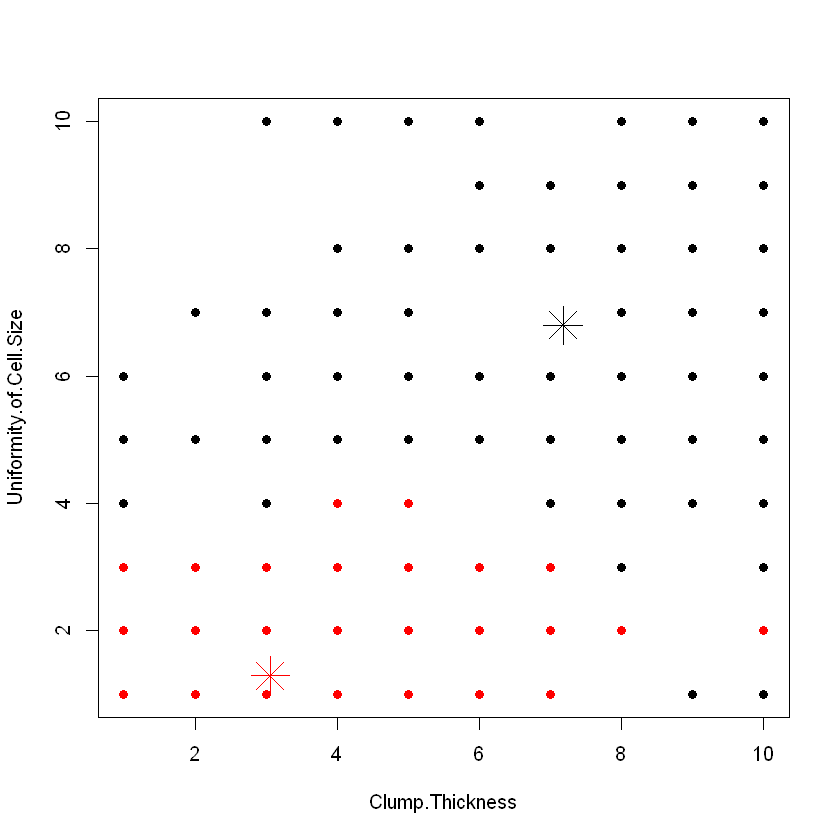

In [22]:
#Plotting clustering result
plot(bcw[, c("Clump.Thickness","Uniformity.of.Cell.Size")], pch=16,
     col=kmeans_result$cluster)
points(kmeans_result$centers, pch=8, cex=3, col=1:2)

Figure above shows that most of the records with Uniformity of Cell Size ≤ 3 is clustered into one group, and the records with Uniformity of Cell Size > 3. 

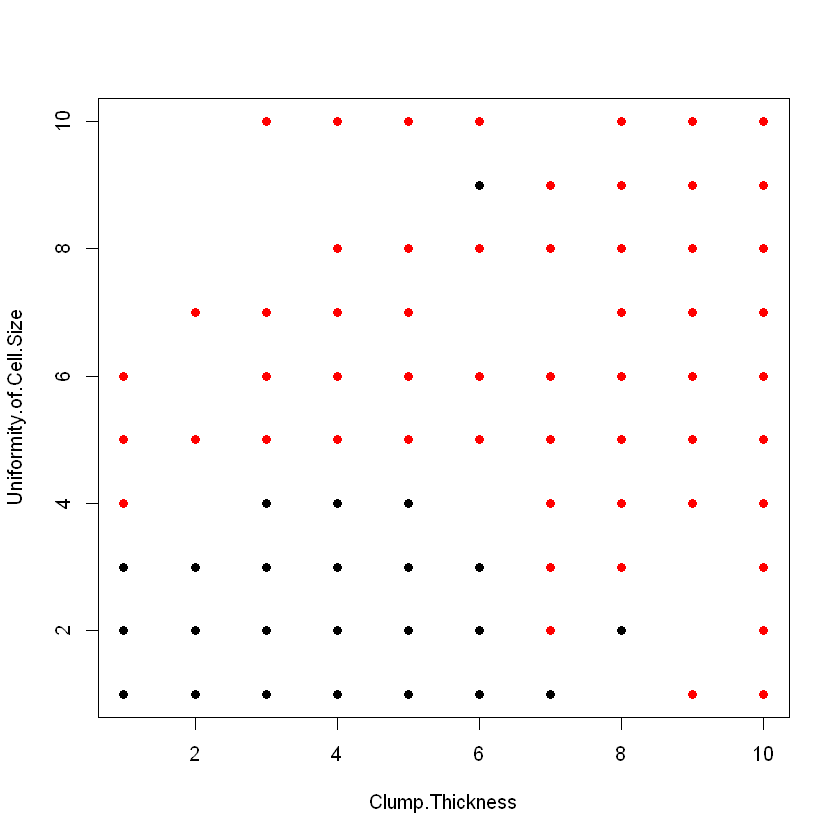

In [27]:
# Plotting with color based on class
plot(bcw[, c("Clump.Thickness","Uniformity.of.Cell.Size")],pch=16,
     col=bcw$Class)

Figure above shows benign has lower value of uniformity of cell size and clump thickness, while malignant has bigger value of those 2 predictors. 

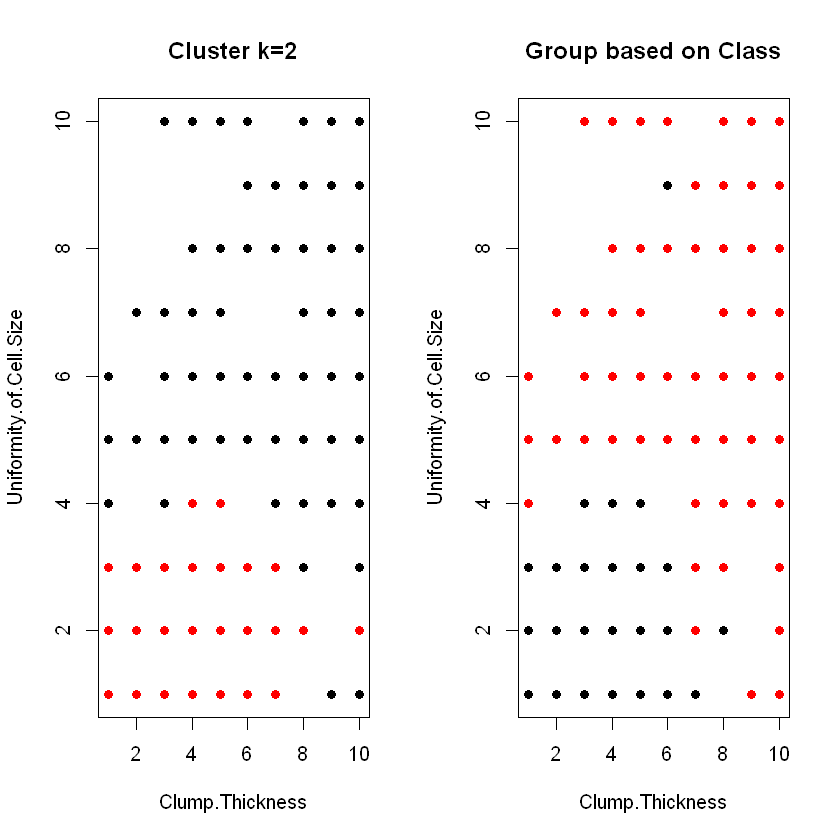

In [29]:
par(mfrow=c(1,2))
plot(bcw[, c("Clump.Thickness","Uniformity.of.Cell.Size")], pch=16,
     col=kmeans_result$cluster, main="Cluster k=2")
plot(bcw[, c("Clump.Thickness","Uniformity.of.Cell.Size")],pch=16,
     col=bcw$Class, main="Group based on Class")
par(mfrow=c(1,1))

K-means clustering with 3 clusters of sizes 123, 442, 118

Cluster means:
  Clump.Thickness Uniformity.of.Cell.Size Uniformity.of.Cell.Shape
1        7.081301                8.430894                 8.146341
2        2.941176                1.251131                 1.361991
3        7.313559                4.762712                 5.016949
  Marginal.Adhesion Single.Ephithelial.Cell.Size Bare.Nuclei Bland.Chromatin
1          6.715447                     6.552846    7.235772        6.959350
2          1.314480                     2.061086    1.271493        2.058824
3          4.457627                     4.169492    8.211864        4.974576
  Normal.Nucleoli  Mitoses
1        7.666667 3.390244
2        1.221719 1.070136
3        4.042373 1.737288

Clustering vector:
  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18  19  20 
  2   3   2   3   2   1   2   2   2   2   2   2   2   2   1   3   2   2   3   2 
 21  22  23  25  26  27  28  29  30  31  32  33  34  35  36 

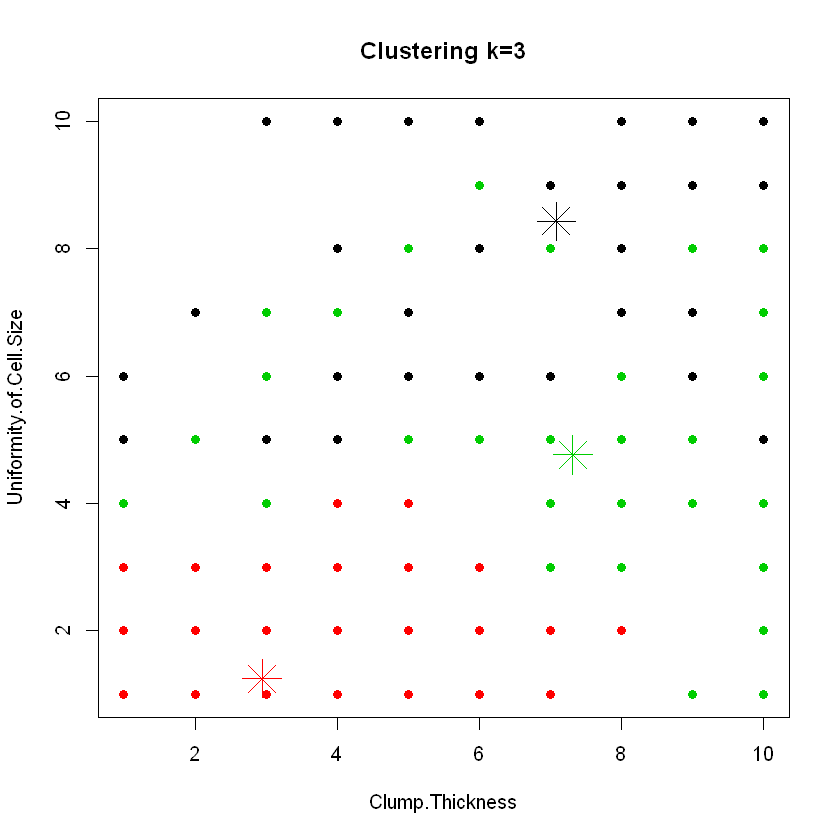

In [30]:
#Clustering data into 3 cluster using K-Means clustering
(kmeans_result_3<-kmeans(bcw_clust,3))

#Plotting clustering result
plot(bcw[, c("Clump.Thickness","Uniformity.of.Cell.Size")],main='Clustering k=3',pch=16,
     col=kmeans_result_3$cluster)
points(kmeans_result_3$centers, pch=8, cex=3, col=1:3)

K-means clustering with 4 clusters of sizes 124, 107, 183, 269

Cluster means:
  Clump.Thickness Uniformity.of.Cell.Size Uniformity.of.Cell.Shape
1        7.096774                8.427419                 8.145161
2        7.280374                4.859813                 5.093458
3        1.262295                1.125683                 1.202186
4        4.252788                1.416357                 1.565056
  Marginal.Adhesion Single.Ephithelial.Cell.Size Bare.Nuclei Bland.Chromatin
1          6.733871                     6.548387    7.201613        6.935484
2          4.523364                     4.130841    8.785047        5.112150
3          1.142077                     1.978142    1.240437        2.000000
4          1.505576                     2.204461    1.342007        2.156134
  Normal.Nucleoli  Mitoses
1        7.612903 3.370968
2        4.214953 1.663551
3        1.065574 1.103825
4        1.375465 1.104089

Clustering vector:
  1   2   3   4   5   6   7   8   9  10  11  1

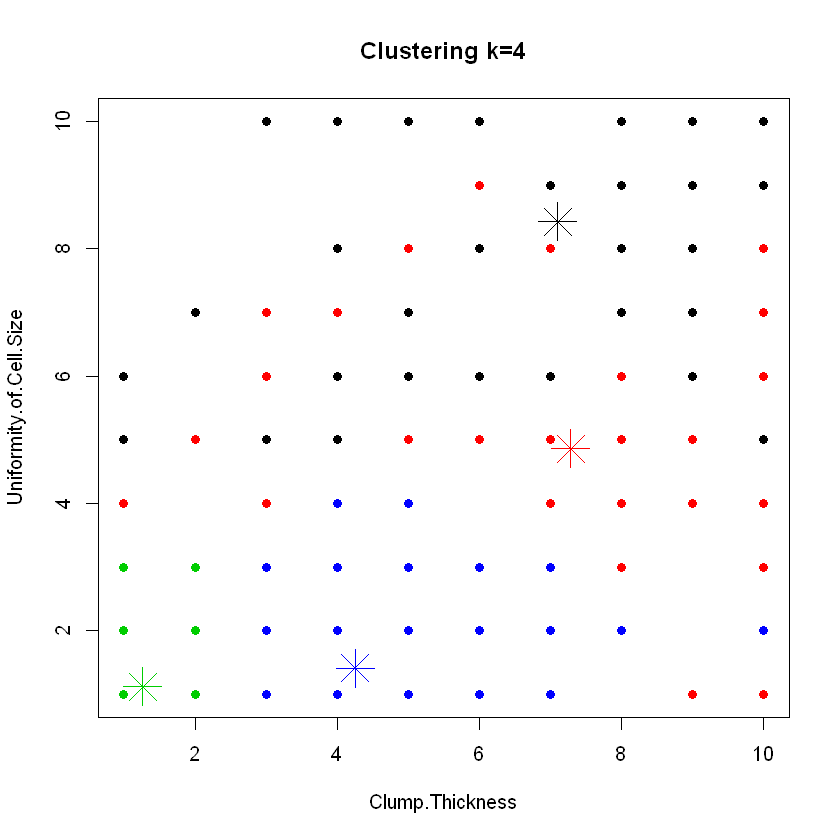

In [31]:
#Clustering data into 4 cluster using K-Means clustering
(kmeans_result_4<-kmeans(bcw_clust,4))

#Plotting clustering result
plot(bcw[, c("Clump.Thickness","Uniformity.of.Cell.Size")],main='Clustering k=4',pch=16,
     col=kmeans_result_4$cluster)
points(kmeans_result_4$centers, pch=8, cex=3, col=1:4)

K-means clustering with 5 clusters of sizes 187, 124, 80, 186, 106

Cluster means:
  Clump.Thickness Uniformity.of.Cell.Size Uniformity.of.Cell.Shape
1        4.834225                1.556150                 1.770053
2        7.096774                8.427419                 8.145161
3        1.762500                1.187500                 1.200000
4        1.822581                1.107527                 1.193548
5        7.264151                4.858491                 5.066038
  Marginal.Adhesion Single.Ephithelial.Cell.Size Bare.Nuclei Bland.Chromatin
1          1.636364                     2.304813    1.358289        2.192513
2          6.733871                     6.548387    7.201613        6.935484
3          1.187500                     1.912500    1.387500        3.250000
4          1.150538                     2.005376    1.215054        1.494624
5          4.556604                     4.150943    8.839623        5.141509
  Normal.Nucleoli  Mitoses
1        1.502674 1.165775

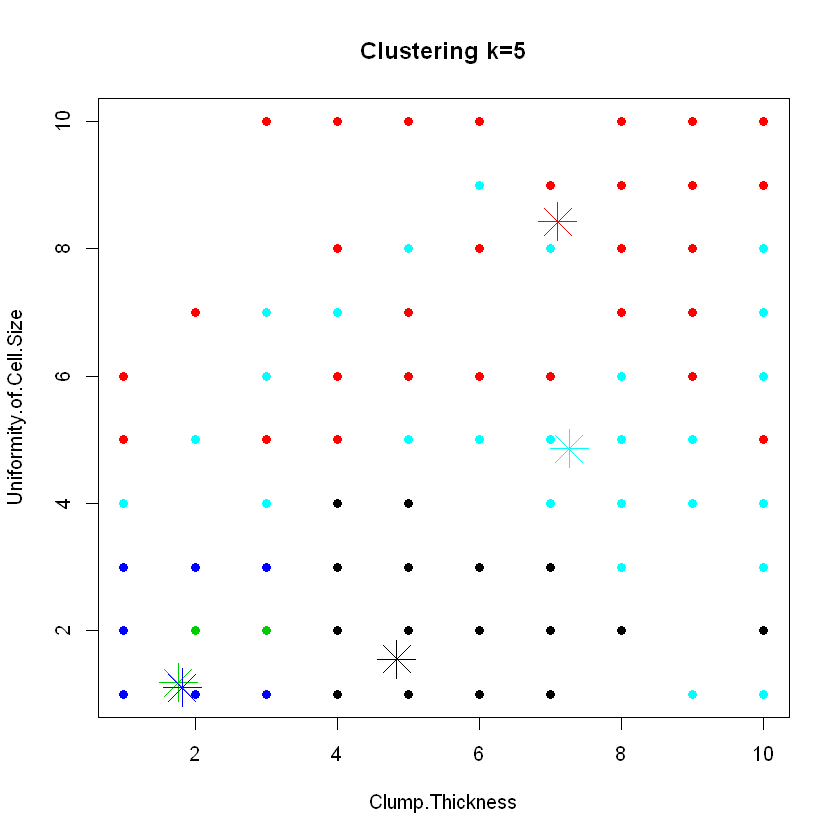

In [32]:
#Clustering data into 5 cluster using K-Means clustering
(kmeans_result_5<-kmeans(bcw_clust,5))

#Plotting clustering result
plot(bcw[, c("Clump.Thickness","Uniformity.of.Cell.Size")],main='Clustering k=5', pch=16,
     col=kmeans_result_5$cluster)
points(kmeans_result_5$centers, pch=8, cex=3, col=1:5)

To evaluate K-Means cluster, the most common measure is using SSE (Sum of Square Error). SSE is basically the sum of SSE of each cluster. 
Within clusters sum of squares is the distances of points to centroid within a cluster. One expects, this ratio, to be as low as possible for each cluster, since we would like to have homogeneity within the clusters. 
Between clusters sum of squares is the mean distances between cluster centroids. One expects, this ratio, to be as higher as possible, since we would like to have heterogeneous clusters.

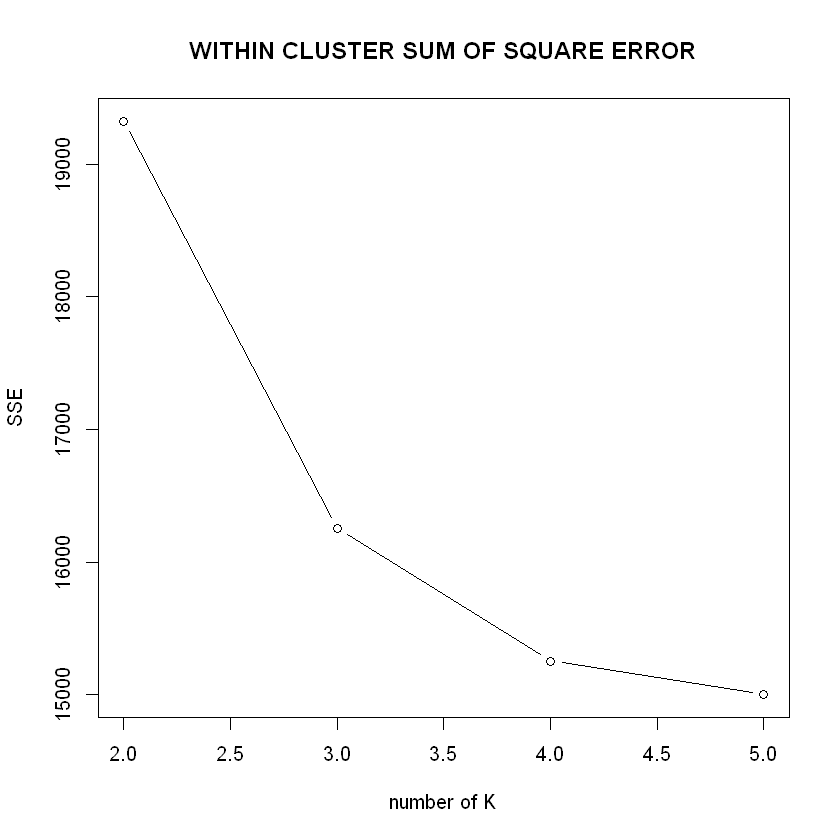

In [33]:
set.seed(7719)
#Comparing within cluster SSE
sse = vector('numeric')
for (i in 2:5){sse[i-1] = sum(kmeans(bcw_clust, centers=i)$withins)}
sse = as.data.frame(sse)
sse$k = seq.int(2,5)
#Making the plot
plot(sse$k,sse$sse, type='b', main = "WITHIN CLUSTER SUM OF SQUARE ERROR", xlab="number of K", 
     ylab = "SSE")

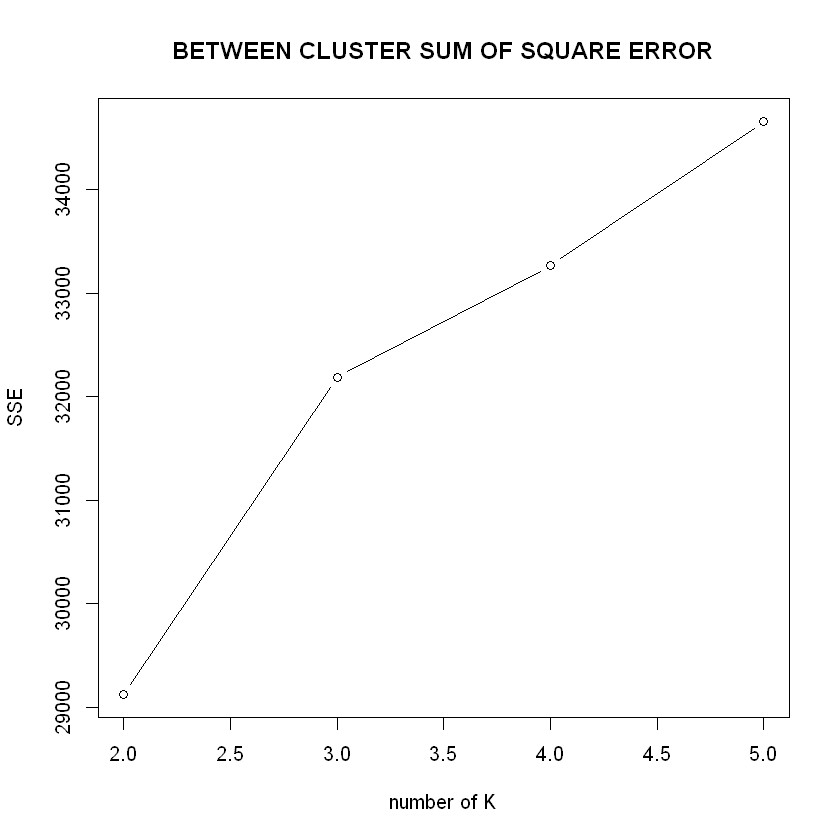

In [34]:
#Comparing between cluster SSE
sse = vector('numeric')
for (i in 2:5){sse[i-1] = sum(kmeans(bcw_clust, centers=i)$betweens)}
sse = as.data.frame(sse)
sse$k = seq.int(2,5)
#Making the plot
plot(sse$k,sse$sse, type='b', main = "BETWEEN CLUSTER SUM OF SQUARE ERROR", xlab="number of K", 
     ylab = "SSE")

We can see as the value of k increases, the value of within SSE decreases and the value of between SSE increases. In this particular case, k=5 is resulting the best clusters.  There is no definitive answer to this question. The optimal number of clusters is somehow subjective and depends on the method used for measuring similarities and the parameters used for partitioning However, there are some popular methods that we can use to calculate optimum clusters in K-means clustering:

### Elbow Method

In [35]:
#Calculating the best k in kmeans using Elbow Method
wss = kmeans(bcw_clust,centers=1)$tot.withinss
for (i in 2:10)
  wss[i] = kmeans(bcw_clust, centers=i)$tot.withinss

In [38]:
install.packages('ggvis')

package 'ggvis' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\bpurba\AppData\Local\Temp\RtmpOI0A0L\downloaded_packages


In [42]:
options(warn = -1)
library(ggvis) #Install.packages("ggvis")
sse = data.frame(c(1:10), c(wss))
names(sse)[1] = 'Clusters'
names(sse)[2] = 'SSE'
sse %>%
  ggvis(~Clusters, ~SSE) %>%
  layer_points(fill := 'blue') %>% 
  layer_lines() %>%
  set_options(height = 300, width = 400)

### Gap Statistic

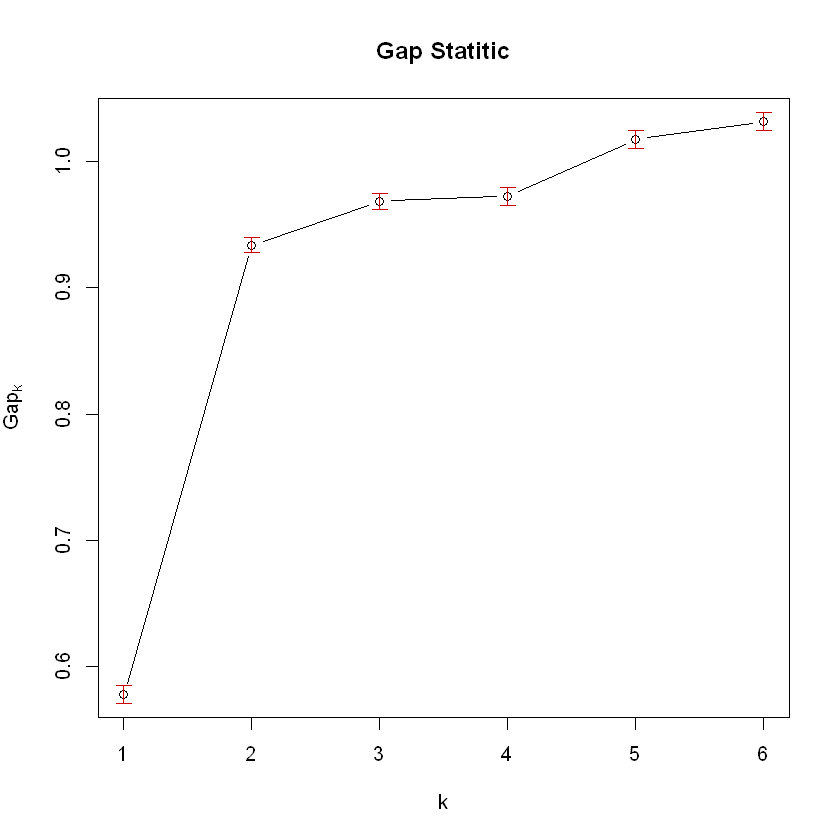

In [41]:
#Calculating optimum Cluster in kmeans using Gap Statistic
library("cluster") #install.packages("cluster")
gsp <- clusGap(bcw_clust, FUN=kmeans, K.max = 6, B=100)
plot(gsp, main="Gap Statitic")

### Hierarchical Clustering

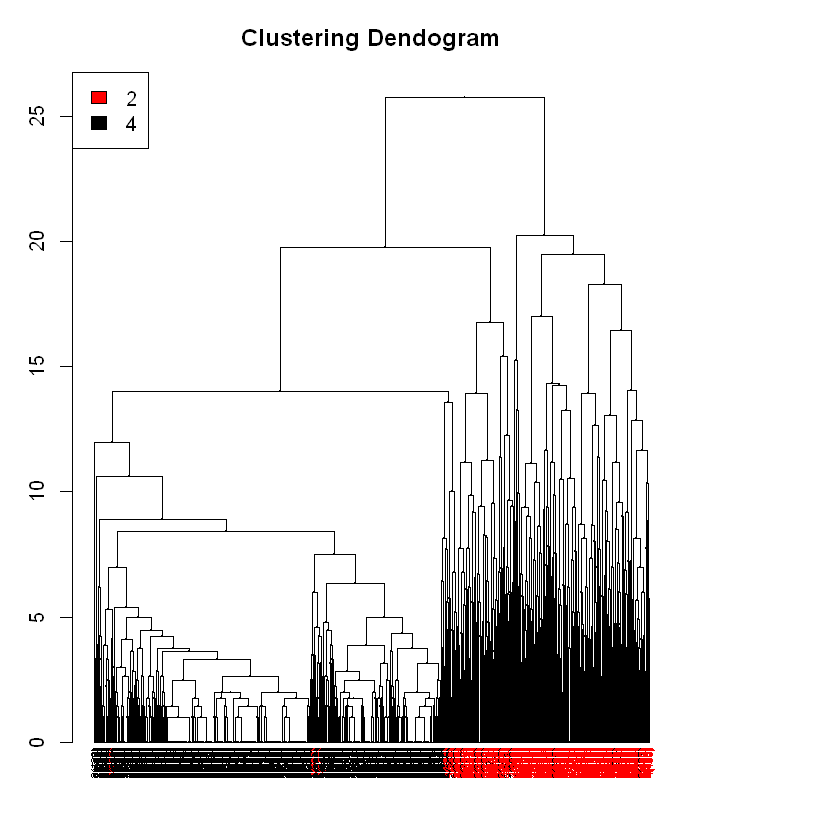

In [46]:
options(warn = -1)
library(dendextend) #install.packages("dendextend")
hc<-hclust(dist(bcw_clust))
dend <- as.dendrogram(hc)
colors_used <- as.numeric(bcw[,10])
colors_used <- colors_used[order.dendrogram(dend)]
labels_colors(dend) <- colors_used
labels(dend) <- paste(as.character(bcw[,10])[order.dendrogram(dend)],
                      "(",labels(dend),")", 
                      sep = "")
dend <- set(dend, "labels_cex", 0.5)
par(mar = c(3,3,3,7))
plot(dend, 
     main = "Clustering Dendogram", 
     horiz =  FALSE,  nodePar = list(cex = .007))
legend("topleft", legend = levels(bcw$Class), fill = c("red","black"))

#### Cluster the dendogram into 2,3,4, and 5 clusters 

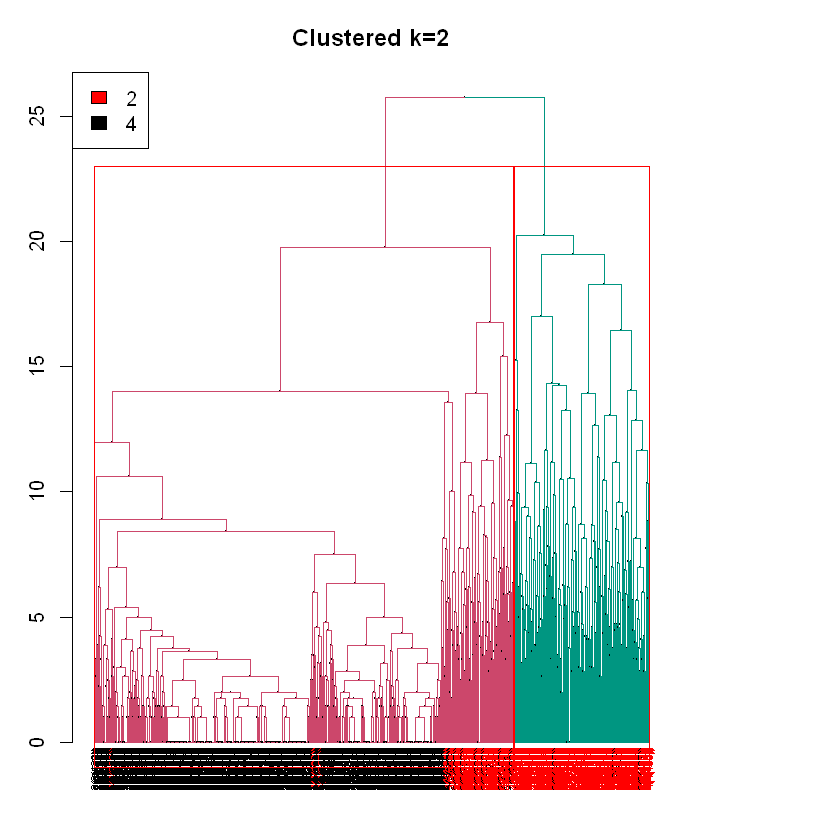

In [47]:
# k=2
dend <- color_branches(dend, k=2)
colors_used <- as.numeric(bcw[,10])
colors_used <- colors_used[order.dendrogram(dend)]
labels_colors(dend) <- colors_used
labels(dend) <- paste(as.character(bcw[,10])[order.dendrogram(dend)],
                      "(",labels(dend),")", 
                      sep = "")
dend <- set(dend, "labels_cex", 0.5)
par(mar = c(3,3,3,7))
plot(dend, 
     main = "Clustered k=2", 
     horiz =  FALSE,  nodePar = list(cex = .007))
legend("topleft", legend = levels(bcw$Class), fill = c("red","black"))
rect.hclust(hc,k=2)

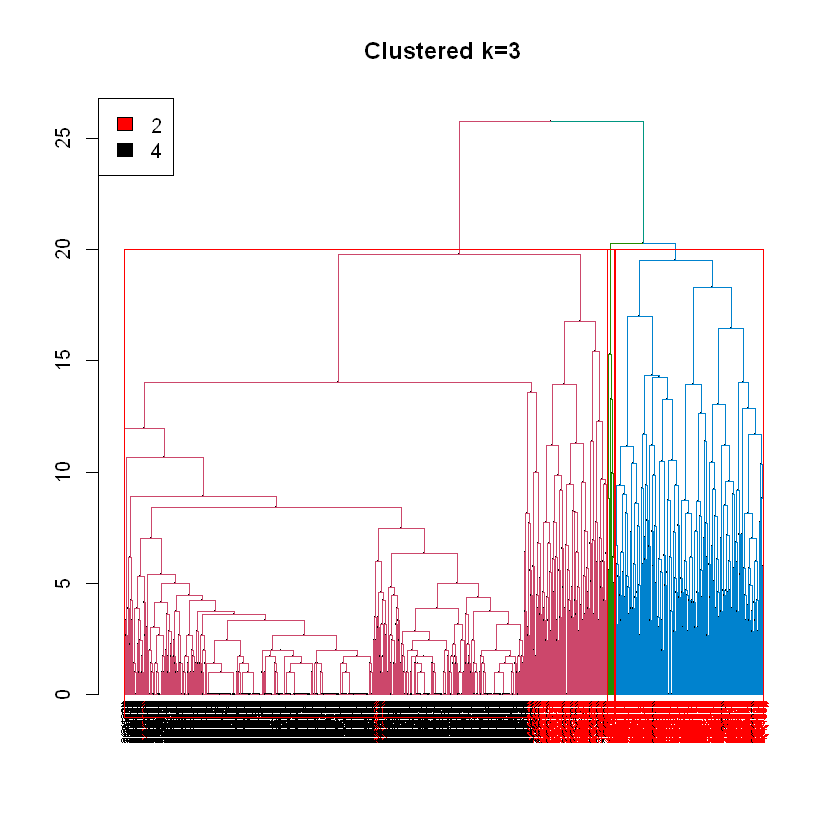

In [48]:
# k=3
dend <- color_branches(dend, k=3)
plot(dend, 
     main = "Clustered k=3", 
     horiz =  FALSE,  nodePar = list(cex = .007))
legend("topleft", legend = levels(bcw$Class), fill = c("red","black"))
rect.hclust(hc,k=3)

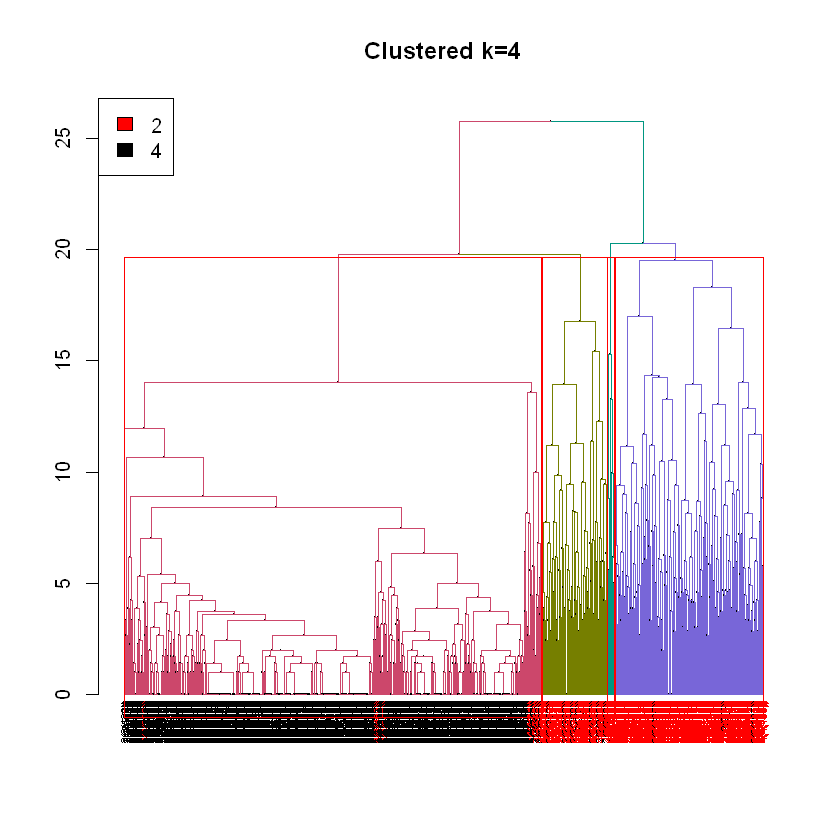

In [49]:
#k = 4
dend <- color_branches(dend, k=4)
plot(dend, 
     main = "Clustered k=4", 
     horiz =  FALSE,  nodePar = list(cex = .007))
legend("topleft", legend = levels(bcw$Class), fill = c("red","black"))
rect.hclust(hc,k=4)

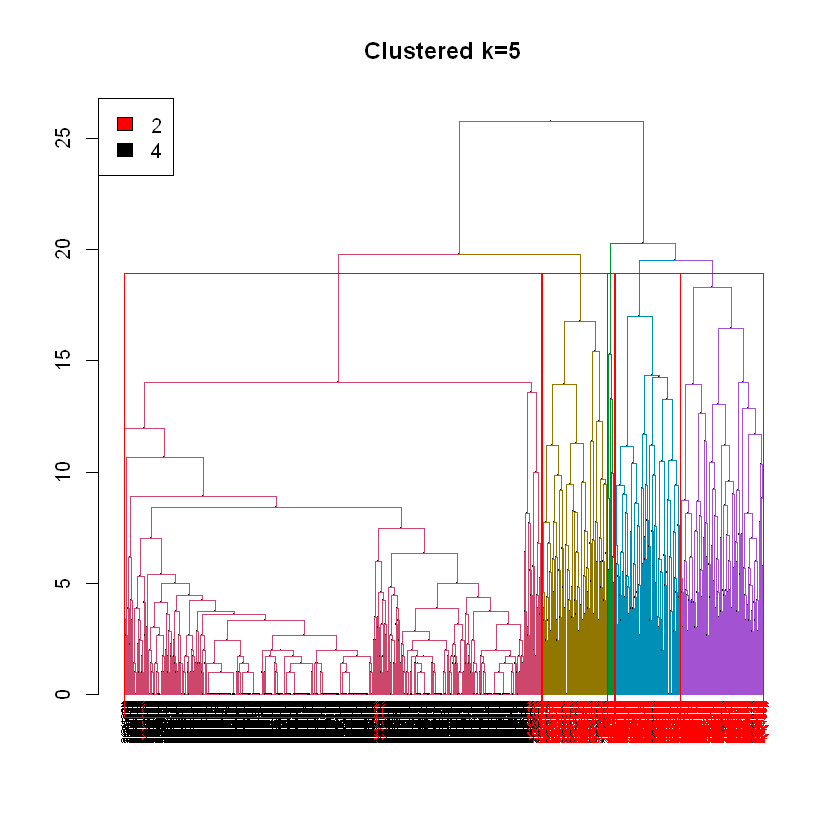

In [50]:
#k=5
dend <- color_branches(dend, k=5)
plot(dend, 
     main = "Clustered k=5", 
     horiz =  FALSE,  nodePar = list(cex = .007))
legend("topleft", legend = levels(bcw$Class), fill = c("red","black"))
rect.hclust(hc,k=5)

When the dendogram is clustered using K=2 , it shows that big portion of class 2 is grouped in one cluster with class 4, while the other cluster’s elements are all class 2. When the K is changed to 3 and 4, that big portion of Class 2 is still grouped in one cluster with Class 4. And finally, when the dendogram is clustered using K=5 , those class 2s are grouped in 1 cluster. 
In this case, we can conclude, that using “Complete” method in Hierarchical Clustering, the distance of that big portion of class 2 is closer to Class 4 than to the rest of other Class 2. I think, this cluster can be classified as a new subtype of disease.


### Hierarchical Clustering using "single" aglomeration method

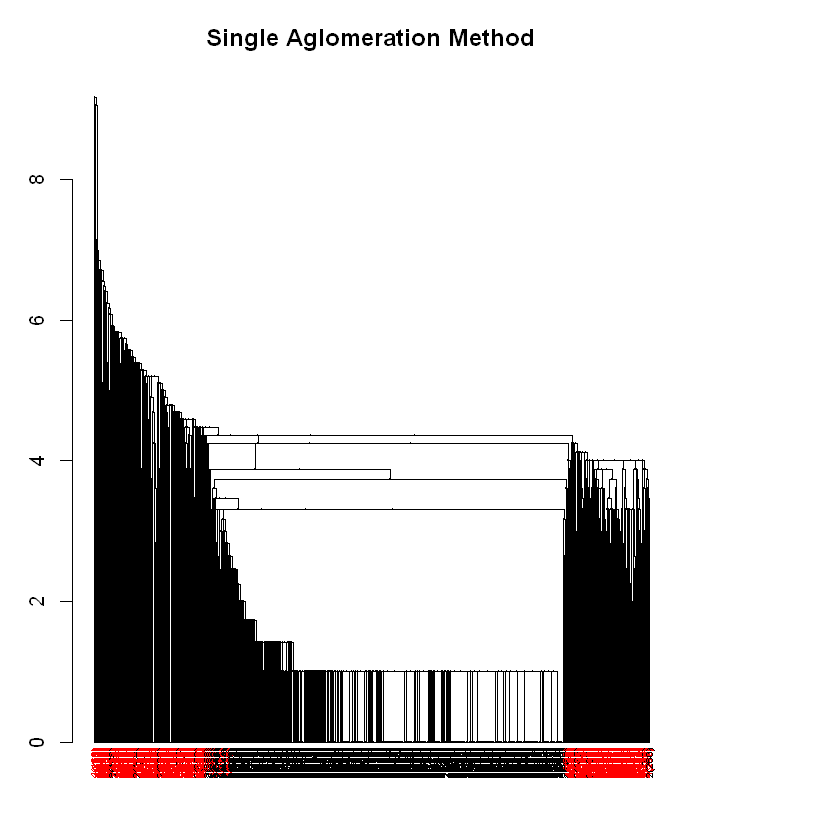

In [51]:
hc_single<-hclust(dist(bcw_clust), method='single')

dend<-as.dendrogram(hc_single)
colors_used <- as.numeric(bcw[,10])
colors_used <- colors_used[order.dendrogram(dend)]
labels_colors(dend) <- colors_used
labels(dend) <- paste(as.character(bcw[,10])[order.dendrogram(dend)],
                      "(",labels(dend),")", 
                      sep = "")
dend <- set(dend, "labels_cex", 0.5)
par(mar = c(3,3,3,7))
plot(dend, 
     main = "Single Aglomeration Method", 
     horiz =  FALSE,  nodePar = list(cex = .007))

### Hierarchical Clustering using "average" aglomeration method

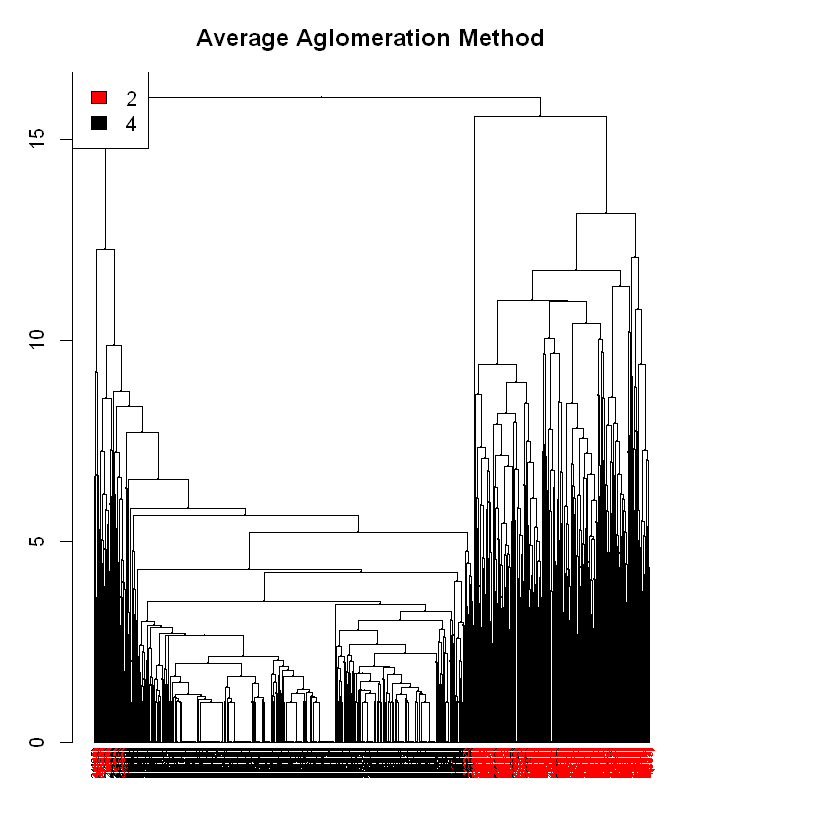

In [52]:
hc_average<-hclust(dist(bcw_clust), method='average')

dend<-as.dendrogram(hc_average)
colors_used <- as.numeric(bcw[,10])
colors_used <- colors_used[order.dendrogram(dend)]
labels_colors(dend) <- colors_used
labels(dend) <- paste(as.character(bcw[,10])[order.dendrogram(dend)],
                      "(",labels(dend),")", 
                      sep = "")
dend <- set(dend, "labels_cex", 0.5)
par(mar = c(3,3,3,7))
plot(dend, 
     main = "Average Aglomeration Method", 
     horiz =  FALSE,  nodePar = list(cex = .007))
legend("topleft", legend = levels(bcw$Class), fill = c("red","black"))

### Hierarchical Clustering using "complete" aglomeration method

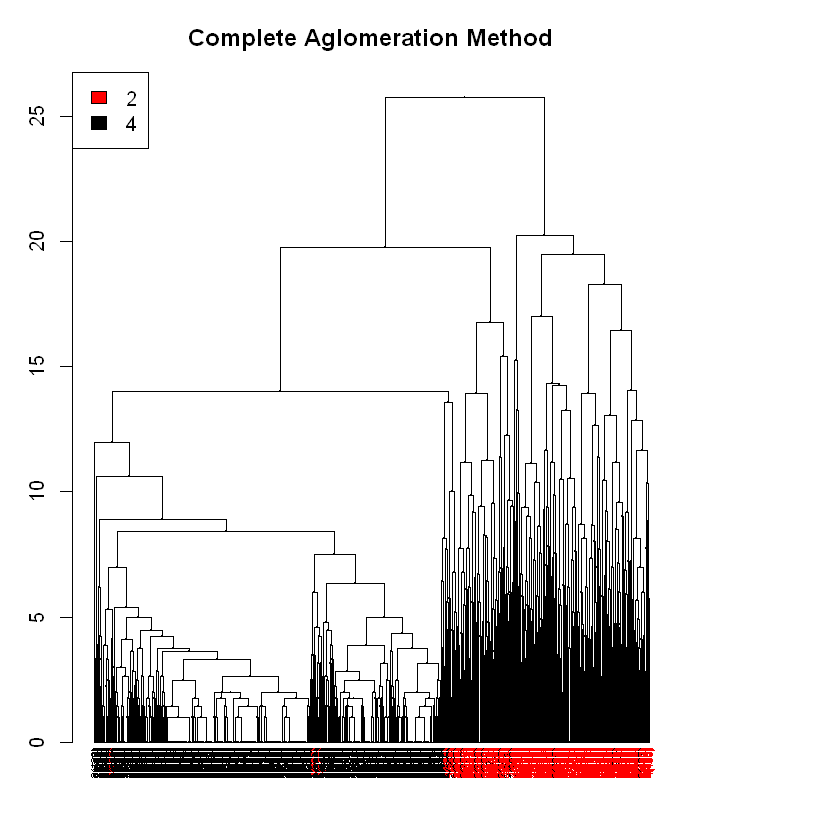

In [53]:
hc_complete<-hclust(dist(bcw_clust), method='complete')
dend<-as.dendrogram(hc_complete)
colors_used <- as.numeric(bcw[,10])
colors_used <- colors_used[order.dendrogram(dend)]
labels_colors(dend) <- colors_used
labels(dend) <- paste(as.character(bcw[,10])[order.dendrogram(dend)],
                      "(",labels(dend),")", 
                      sep = "")
dend <- set(dend, "labels_cex", 0.5)
par(mar = c(3,3,3,7))
plot(dend, 
     main = "Complete Aglomeration Method", 
     horiz =  FALSE,  nodePar = list(cex = .007))
legend("topleft", legend = levels(bcw$Class), fill = c("red","black"))

We can see the the dendograms of average and complete method are quite similar, but they are very different compared to dendogram of single method. Hence, we can tell that the data is sensitive to the used of agglomeration method.